# Dados Metereológicos Semanais Automáticas

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

### Construção de um dataframe com as colunas que representam as variáveis desejadas

In [2]:
#caminho do arquivo csv
file_path = Path(
    '../../Dados/Dados-Metereologicos/Diarios/' +\
        'dados_A320_D_A_2008-01-01_2013-12-31.csv'
    )

#importando o arquivo csv como um Dataframe

df_diario = pd.read_csv(file_path,
                 header=9,
                 sep=';', 
                 usecols=
                 ['Data Medicao',
                  'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
                  'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
                  'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
                  'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)' ]
                 )

df_diario.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,2008-01-01,0,"30,7","10,8","2,820833"
1,2008-01-02,0,"30,6","8,8","2,770833"
2,2008-01-03,0,"30,7","11,4","3,704167"
3,2008-01-04,",2","30,4","11,5","3,2625"
4,2008-01-05,0,"30,4","10,2","2,833333"


Como os arquivos CSV do site do INMET referente aos dados diários não possuiam da variável radiação solar, esse foi adicionado posteriormente advindo da manipulação feita nos dados horários.

In [3]:
#caminho do arquivo csv radiação
file_path_rads = Path('../../Dados/Dados-Metereologicos/Diarios/dados_radiacao.csv')
#criando o dataframe da radiação e retirando a coluna Data Medicao
df_rads_diaria = pd.read_csv(file_path_rads)
df_rads_diaria.drop('Data Medicao', axis=1, inplace=True)
df_rads_diaria.head()

,RADIACAO GLOBAL MÁXIMA(Kj/m²)
0,3610.771
1,3167.936
2,3429.173
3,3115.432
4,3456.494


In [4]:
df_diario['RADIACAO GLOBAL MÁXIMA(Kj/m²)'] = df_rads_diaria
df_diario.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",RADIACAO GLOBAL MÁXIMA(Kj/m²)
0,2008-01-01,0,"30,7","10,8","2,820833",3610.771
1,2008-01-02,0,"30,6","8,8","2,770833",3167.936
2,2008-01-03,0,"30,7","11,4","3,704167",3429.173
3,2008-01-04,",2","30,4","11,5","3,2625",3115.432
4,2008-01-05,0,"30,4","10,2","2,833333",3456.494


A coluna "Data Medicao" é composta por strings, então há a necessidade de transformar para Datetime e logo após transformar essa coluna, em uma coluna de índices

In [5]:
#transformando a coluna Data Medicao para o formato Datetime
df_diario['Data Medicao'] = pd.to_datetime(df_diario['Data Medicao'])
df_diario.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",RADIACAO GLOBAL MÁXIMA(Kj/m²)
0,2008-01-01,0,"30,7","10,8","2,820833",3610.771
1,2008-01-02,0,"30,6","8,8","2,770833",3167.936
2,2008-01-03,0,"30,7","11,4","3,704167",3429.173
3,2008-01-04,",2","30,4","11,5","3,2625",3115.432
4,2008-01-05,0,"30,4","10,2","2,833333",3456.494


In [6]:
#transformando a coluna Data Medicao em índices
df_diario.set_index('Data Medicao', inplace=True)
df_diario.head()

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",RADIACAO GLOBAL MÁXIMA(Kj/m²)
Data Medicao,,,,,
2008-01-01,0,"30,7","10,8","2,820833",3610.771
2008-01-02,0,"30,6","8,8","2,770833",3167.936
2008-01-03,0,"30,7","11,4","3,704167",3429.173
2008-01-04,",2","30,4","11,5","3,2625",3115.432
2008-01-05,0,"30,4","10,2","2,833333",3456.494


As colunas que possuem valor numérico são strings com a notação diferente para ponto flutuante, no próximo bloco de códigos é trocado as vírgulas por pontos (ajustando a notação) e retornado um tipo float ao invés de string.

In [7]:
#transformando os dados numéricos de str para float
for coluna in df_diario.columns:
    if(coluna != 'RADIACAO GLOBAL MÁXIMA(Kj/m²)'):
        df_diario[coluna] =\
            df_diario[coluna].str.replace(',','.').astype(float)

df_diario.head()

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",RADIACAO GLOBAL MÁXIMA(Kj/m²)
Data Medicao,,,,,
2008-01-01,0.0,30.7,10.8,2.820833,3610.771
2008-01-02,0.0,30.6,8.8,2.770833,3167.936
2008-01-03,0.0,30.7,11.4,3.704167,3429.173
2008-01-04,0.2,30.4,11.5,3.262500,3115.432
2008-01-05,0.0,30.4,10.2,2.833333,3456.494


### Criando o dataframe com os dados semanais

Nessa próxima parte do código, é criado o dataframe semanais considerando os máximos diários.

In [8]:
#Criando o dataframe das temperaturas com as colunas desejadas
df_semanal = pd.DataFrame(columns =['TEMPERATURA MÁXIMA(°C)',
                                 'PRECIPITAÇÃO MÁXIMA(mm)',
                                 'VENTO, RAJADA MÁXIMA(m/s)',
                                 'VELOCIDADE DO VENTO MÁXIMA(m/s)',
                                 'RADIAÇÃO MÁXIMA(Kj/m²)'
                                ])

#A temperatura máxima semanal será a máxima temperatura diária
df_semanal['TEMPERATURA MÁXIMA(°C)']=\
    df_diario['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'].resample('W-SUN').max()

#A precipitação máxima semanal é a máxima precipitação diária
df_semanal['PRECIPITAÇÃO MÁXIMA(mm)']=\
    df_diario['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'].resample('W-SUN').max()

#A velocidade da rajada máxima semanal é a máxima velocidade das rajadas diárias
df_semanal['VENTO, RAJADA MÁXIMA(m/s)']=\
    df_diario['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)'].resample('W-SUN').max()

#a velocidade do vento máxima semanal é máxima velocidade do vento diária
df_semanal['VELOCIDADE DO VENTO MÁXIMA(m/s)']=\
    df_diario['VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)'].resample('W-SUN').max()

#a radiação global máxima semanal é a máxima radiação global diária
df_semanal['RADIAÇÃO MÁXIMA(Kj/m²)']=\
    df_diario['RADIACAO GLOBAL MÁXIMA(Kj/m²)'].resample('W-SUN').max()


df_semanal.head()

,TEMPERATURA MÁXIMA(°C),PRECIPITAÇÃO MÁXIMA(mm),"VENTO, RAJADA MÁXIMA(m/s)",VELOCIDADE DO VENTO MÁXIMA(m/s),RADIAÇÃO MÁXIMA(Kj/m²)
Data Medicao,,,,,
2008-01-06,30.7,0.2,11.7,3.704167,3610.771
2008-01-13,30.9,7.8,10.8,2.500000,3768.267
2008-01-20,30.8,17.8,11.2,2.650000,3593.026
2008-01-27,31.1,1.4,9.6,2.458333,3683.544
2008-02-03,31.4,41.4,9.7,2.383333,4006.978


### Gráficos por variável

In [9]:
#Propriedade dos Gráficos

#selecionando a aparência do gráfico
plt.style.use('seaborn-dark-palette')

#função que cria os subplots [3x2]
def met_subplots(fig_axes, coluna, label_y, legenda):
    label_x = 'Semana'
    ano = 2008
    #laço que percorre cada subplot, sendo i a linha e j a coluna desse.
    for i in range(3):
        for j in range(2):
            
            #selecionando o dado que vai ser plotado (divididos por anos) 
            df = df_semanal.loc[df_semanal.index.year == ano][coluna]
            
            #criando uma lista para enumerar a semana de acordo com o ano
            semana = [num_da_semana+1 for num_da_semana in range(len(df))]
           
            #realizando o plot numero_da_semana x variável 
            fig_axes[i,j].plot(semana, df, label=legenda)

            #definindo o título do subplot
            fig_axes[i,j].set_title(f'Ano de {ano}', size=25)
            ano = ano + 1

            #definindo labels
            fig_axes[i,j].set_xlabel(label_x, size=20)
            fig_axes[i,j].set_ylabel(label_y, size=20)

            #ajustando os ticks
            fig_axes[i,j].tick_params(axis='x', labelsize=16, rotation=40)
            fig_axes[i,j].tick_params(axis='y', labelsize=16)

            #f1_axes[i,j].xaxis.set_major_locator(ticker.LinearLocator(52))
            #f1_axes[i,j].xaxis.set_major_formatter(fmt)
            #f1_axes[i,j].xaxis.set_minor_locator(days)

            #adicionando a grade e a legenda ao subplot
            fig_axes[i,j].grid(True)
            if legenda != '':
                fig_axes[i,j].legend()

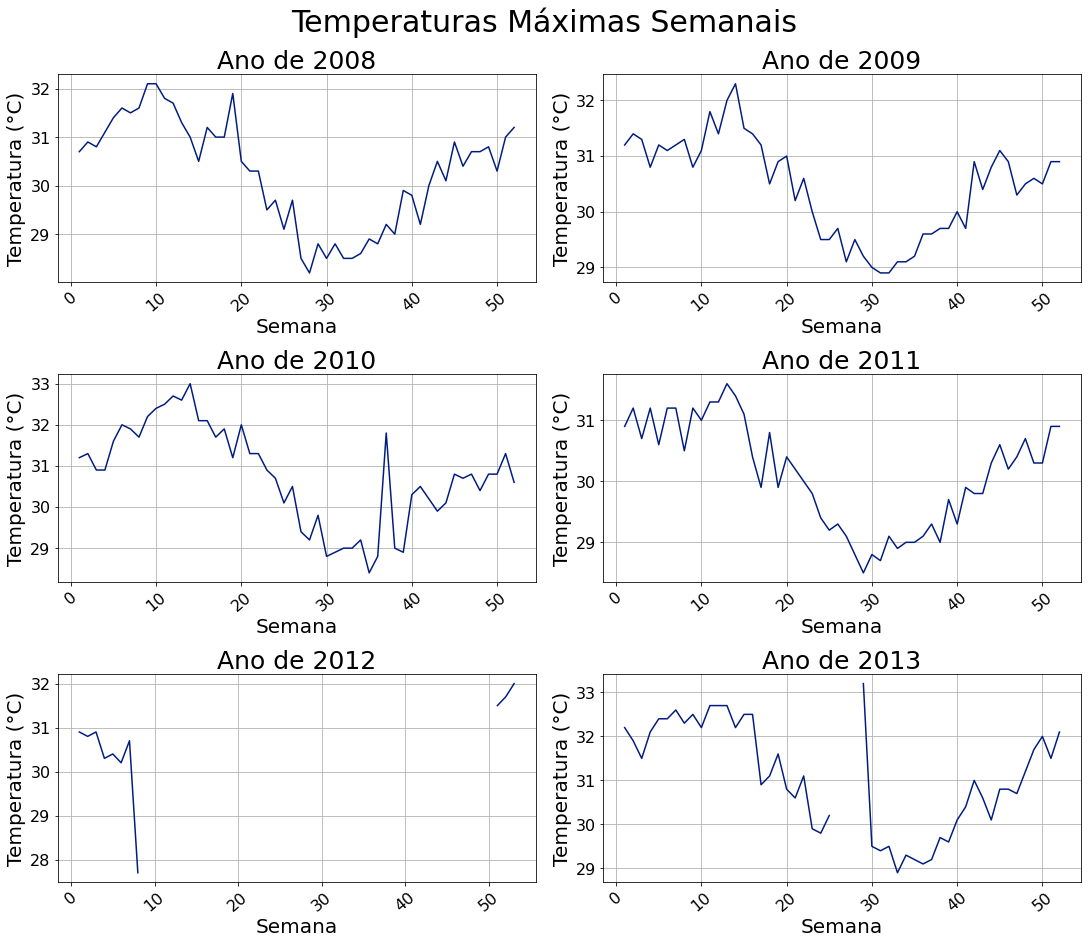

In [10]:
#plotar gráficos temperatura:

fig1, f1_axes = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(15,13))

fig1.suptitle('Temperaturas Máximas Semanais',size=30)

colunas_temp = 'TEMPERATURA MÁXIMA(°C)'   

label_y_T = 'Temperatura (°C)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f1_axes, coluna = colunas_temp, label_y = label_y_T, legenda = '')

#salvando a figura na pasta /Plots/Semanais com o nome de "Temperatura-Automatica.png"  
path_plot_temp = Path('./Plots/Semanais/Temperatura-Automatica.png')
fig1.savefig(path_plot_temp, format='png')

#### Nos dados referentes a temperatura fica explícito que em quase todo o ano de 2012 ocorreu algum problema nessa mensuração. Ainda, em 2013 conseguimos reparar alguns dados faltantes entre a semana 24 até a semana 27 (Número exato da semana confirmado ao fim do Notebook). Verificaremos ao longo dos outros gráficos que esse é um comportamento que se repete.

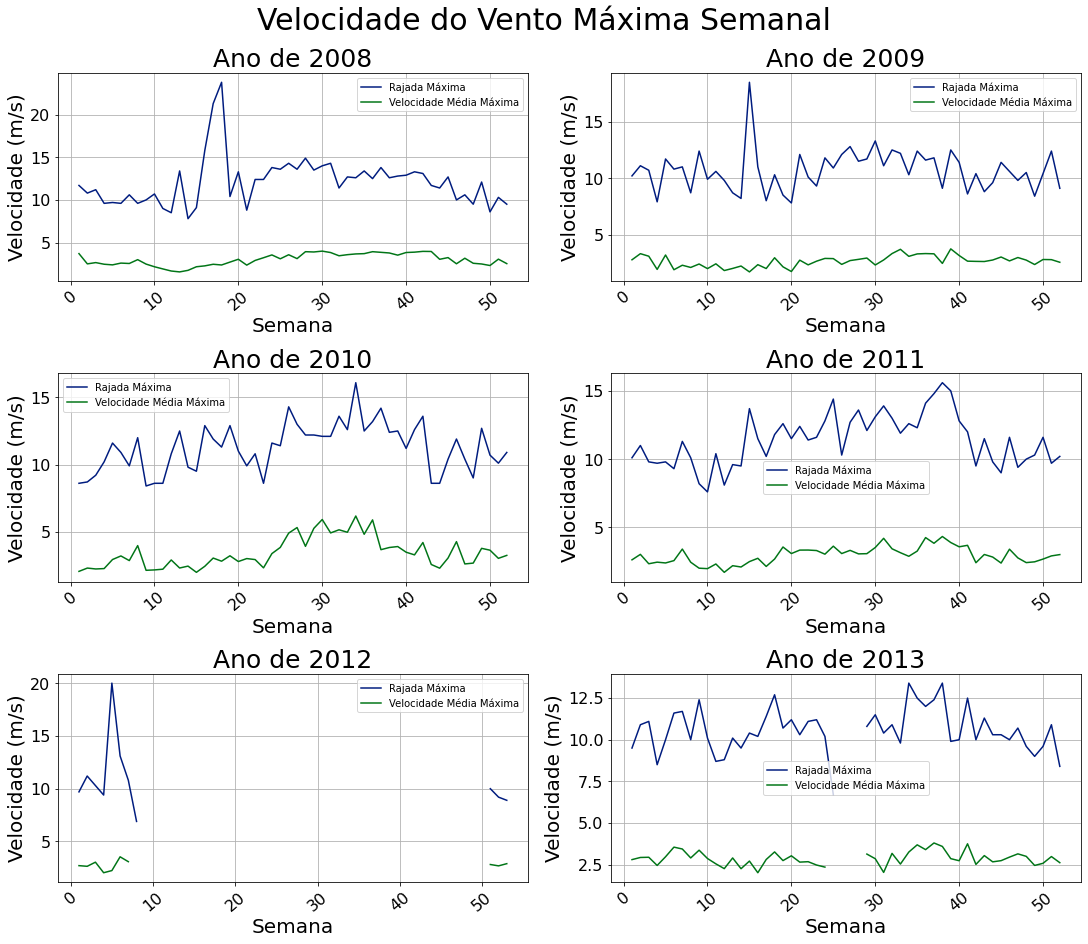

In [11]:
#Gráficos da velocidade do vento
fig2, f2_axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(15,13))

fig2.suptitle('Velocidade do Vento Máxima Semanal',size=30)

colunas_vento = ['VENTO, RAJADA MÁXIMA(m/s)',
                'VELOCIDADE DO VENTO MÁXIMA(m/s)']

label_y_V = 'Velocidade (m/s)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f2_axes, coluna = colunas_vento[0], label_y = label_y_V, legenda = 'Rajada Máxima')
met_subplots(fig_axes = f2_axes, coluna = colunas_vento[1], label_y = label_y_V, legenda = 'Velocidade Média Máxima')

#salvando a figura na pasta /Plots/Semanais com o nome de "Vento-Automatica.png"  
path_plot_vento = Path('./Plots/Semanais/Vento-Automatica.png') #utilizando essa biblioteca para que o código funcione em windows
fig2.savefig(path_plot_vento, format='png')

#### Mais uma vez, no ano de 2012 e no mesmo intervalo que se encontra entre a semana 24 até semana 27, encontram-se anormalidades, no caso dados faltantes.

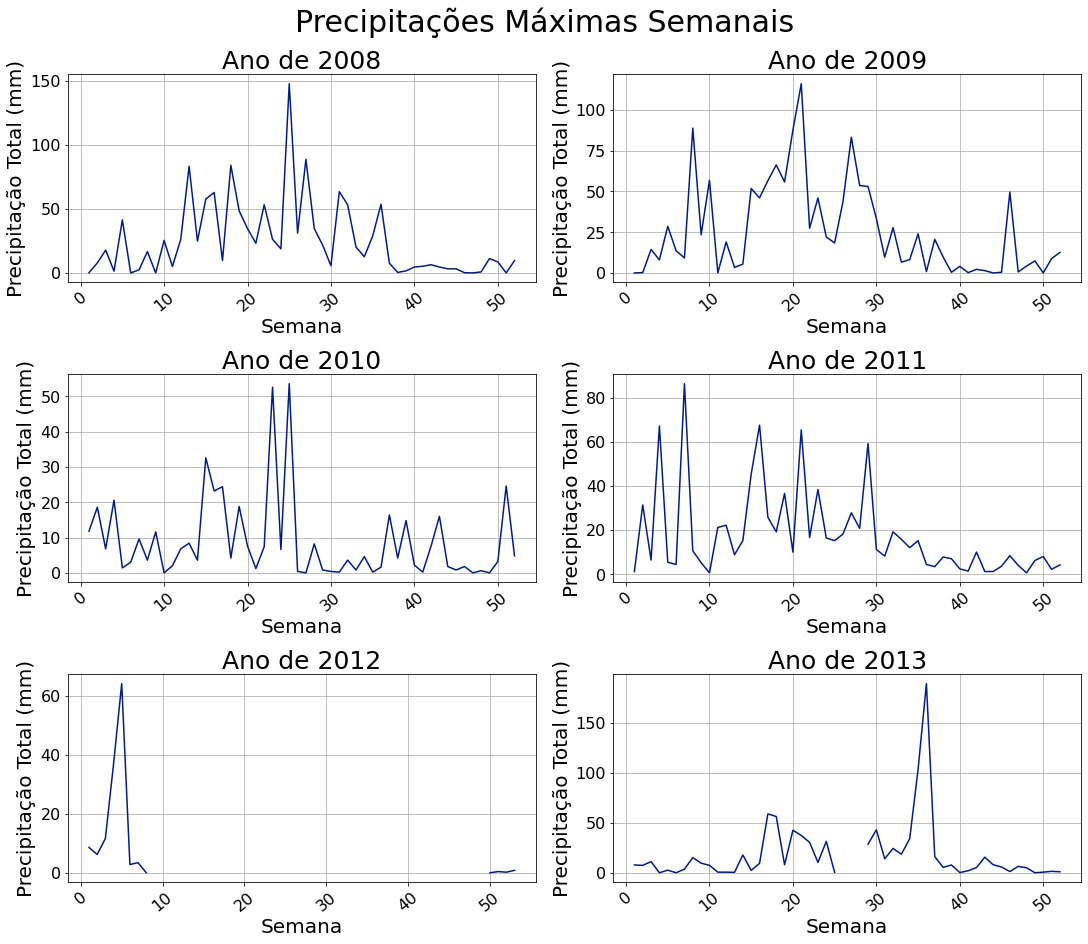

In [12]:
#Gráfico das chuvas

fig3, f3_axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(15,13))

fig3.suptitle('Precipitações Máximas Semanais',size=30)

label_y_C = 'Precipitação Total (mm)'
colunas_chuva =  'PRECIPITAÇÃO MÁXIMA(mm)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f3_axes, coluna = colunas_chuva, label_y = label_y_C, legenda = '')


#salvando a figura na pasta /Plots/Semanais com o nome de "Chuva-Automatica.png"  
path_plot_chuva = Path('./Plots/Semanais/Chuva-Automatica.png') #utilizando essa biblioteca para que o código funcione em windows
fig3.savefig(path_plot_chuva, format='png')

Como visto anteriormente percebemos a anormalidade nos dados referentes ao ano de 2012 e no intervalo específico entre a semana 24 e a semana 27.

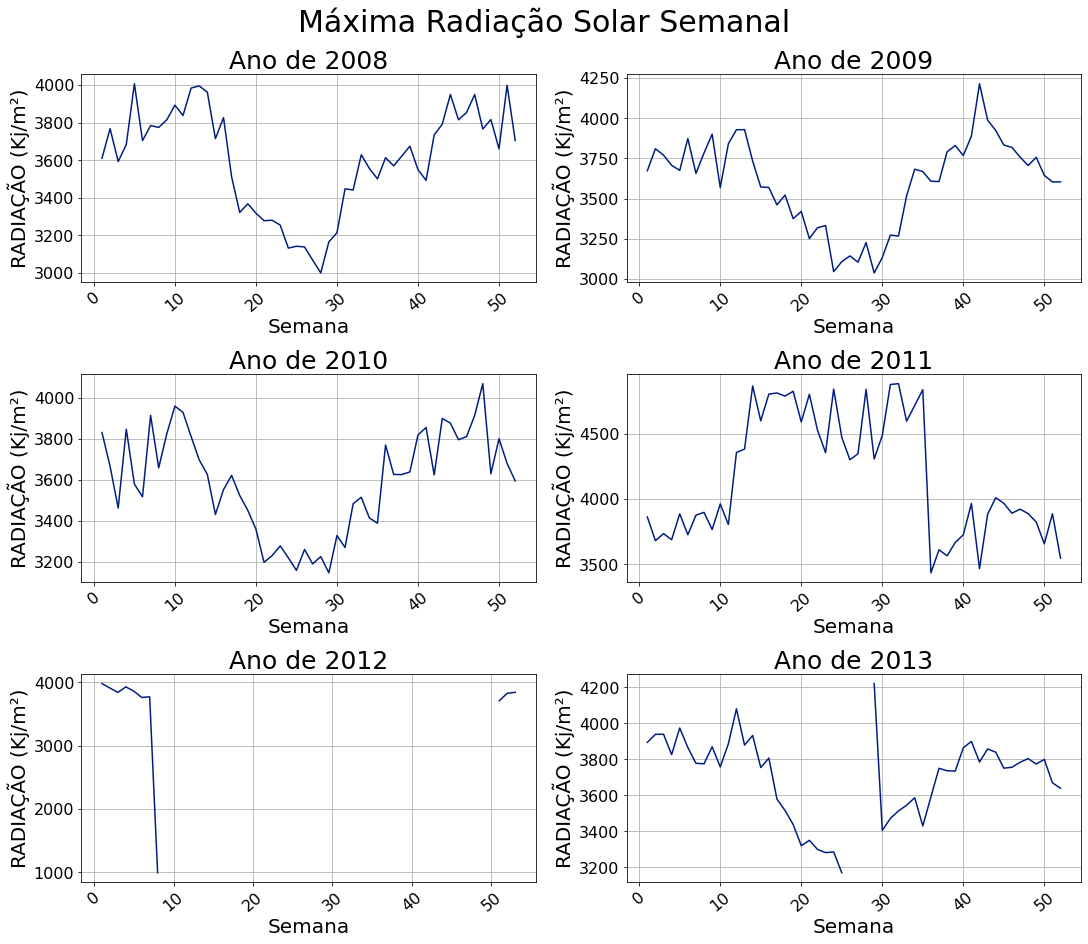

In [13]:
#Gráficos da radiação solar
fig4, f4_axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(15,13))

fig4.suptitle('Máxima Radiação Solar Semanal',size=30)

colunas_rads = 'RADIAÇÃO MÁXIMA(Kj/m²)'

label_y_R = 'RADIAÇÃO (Kj/m²)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f4_axes, coluna = colunas_rads, label_y = label_y_R, legenda = '')
        
#salvando a figura na pasta /Plots/Semanais com o nome de "Radiacao-Automatica.png"  
path_plot_rads = Path('./Plots/Semanais/Radiacao-Automatica.png') 
fig4.savefig(path_plot_rads, format='png')

### Avaliando o intervalo de semana de 2012 que apresenta incongruência nos dados

#### Nessa parte, é feito uma tabela com todos os dados semanais. As colunas e linhas que existem valores são preenchidas com False, do contrário é retornado um True, afirmando que o dado é faltante.

É possível observar através disso que a partir da semana 7 de 2012 até a semana 49 os dados são inconsistentes.

In [14]:
#dividindo o dataframe por ano
dados_2012 = df_semanal.loc[df_semanal.index.year==2012].isnull()
dados_2012.reset_index(inplace=True)
coluna = df_semanal.columns

#Criando um dataframe que possui as linhas que existem dados faltantes
dados_faltantes_2012 =  dados_2012.loc[
    dados_2012[coluna[0]] | 
    dados_2012[coluna[1]] | 
    dados_2012[coluna[2]] | 
    dados_2012[coluna[3]] |
    dados_2012[coluna[4]] == True 
]

display(dados_faltantes_2012)

,Data Medicao,TEMPERATURA MÁXIMA(°C),PRECIPITAÇÃO MÁXIMA(mm),"VENTO, RAJADA MÁXIMA(m/s)",VELOCIDADE DO VENTO MÁXIMA(m/s),RADIAÇÃO MÁXIMA(Kj/m²)
7,2012-02-19,False,False,False,True,False
8,2012-02-26,True,True,True,True,True
9,2012-03-04,True,True,True,True,True
10,2012-03-11,True,True,True,True,True
11,2012-03-18,True,True,True,True,True
12,2012-03-25,True,True,True,True,True
13,2012-04-01,True,True,True,True,True
14,2012-04-08,True,True,True,True,True
15,2012-04-15,True,True,True,True,True
16,2012-04-22,True,True,True,True,True


### Avaliando o intervalo de semana de 2013 que apresenta incongruência nos dados
Podemos verificar que os dados de 2013 apresentam inconsistência na semana 24 até a 27

In [15]:
#dividindo o dataframe por ano
dados_2013 = df_semanal.loc[df_semanal.index.year==2013].isnull()
dados_2013.reset_index(inplace=True)
coluna = df_semanal.columns

#Criando um dataframe que possui as linhas que existem dados faltantes
dados_faltantes_2013 =  dados_2013.loc[
    dados_2013[coluna[0]] | 
    dados_2013[coluna[1]] | 
    dados_2013[coluna[2]] | 
    dados_2013[coluna[3]] |
    dados_2013[coluna[4]] == True 
]

display(dados_faltantes_2013)

,Data Medicao,TEMPERATURA MÁXIMA(°C),PRECIPITAÇÃO MÁXIMA(mm),"VENTO, RAJADA MÁXIMA(m/s)",VELOCIDADE DO VENTO MÁXIMA(m/s),RADIAÇÃO MÁXIMA(Kj/m²)
24,2013-06-23,False,False,False,True,False
25,2013-06-30,True,True,True,True,True
26,2013-07-07,True,True,True,True,True
27,2013-07-14,True,True,True,True,True


### Quantidade de semanas de cada ano

In [16]:
for ano in range(6): 
    semanas_no_ano = len(df_semanal.loc[df_semanal.index.year==ano+2008])
    print(f'{ano+2008} possui {semanas_no_ano}')

2008 possui 52
2009 possui 52
2010 possui 52
2011 possui 52
2012 possui 53
2013 possui 52
